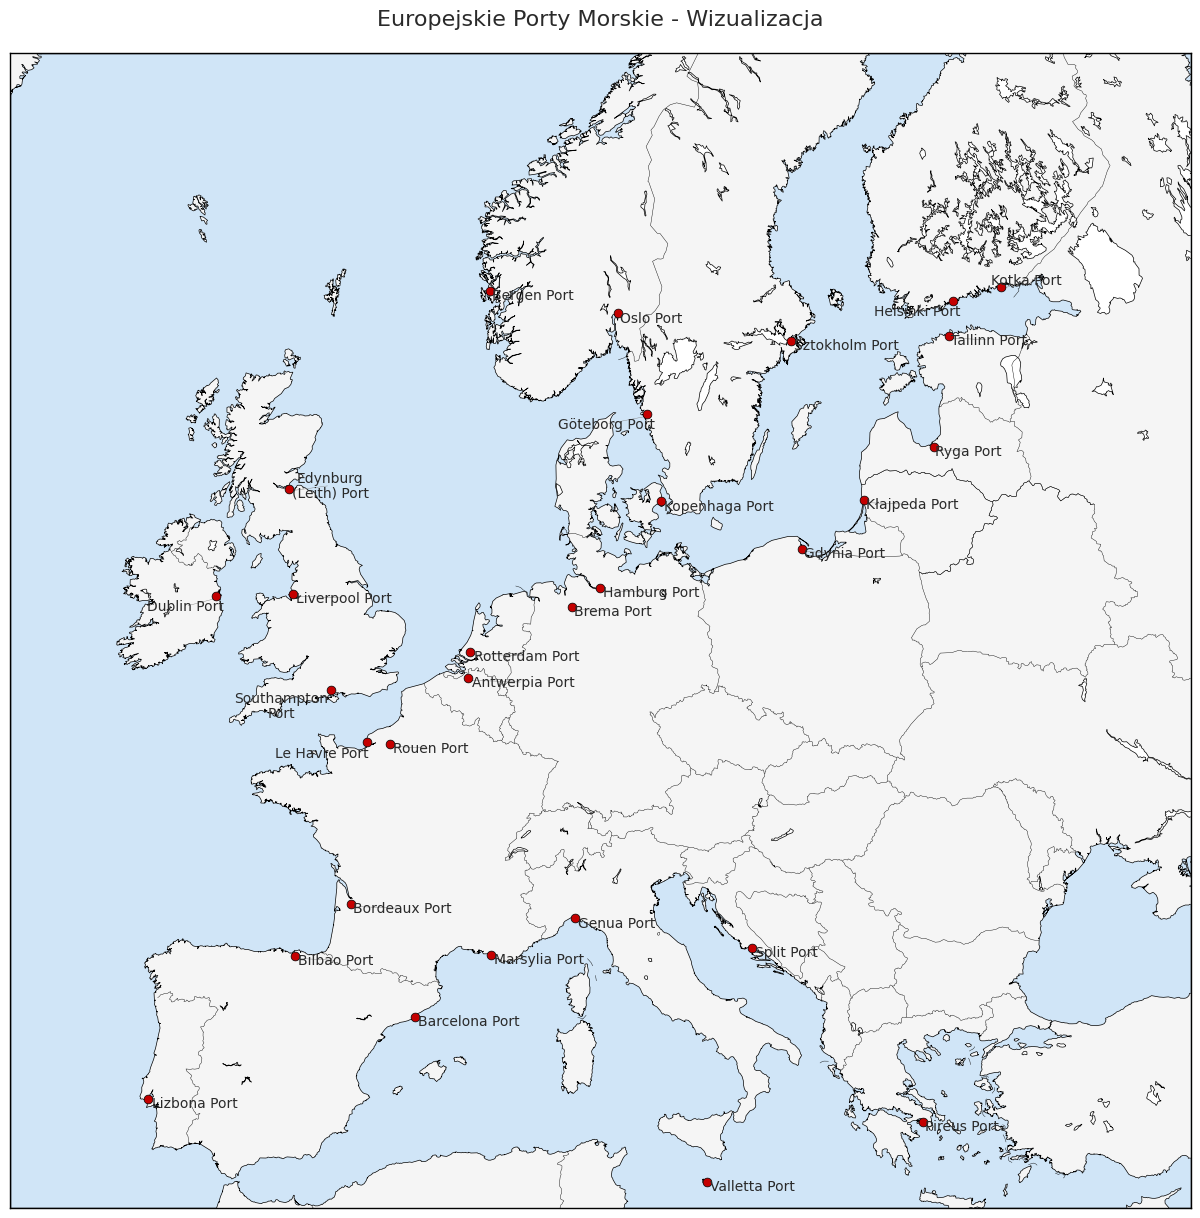

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from adjustText import adjust_text

def plot_ports(split_length=12, max_distance_km=200, font_size=9):
    ports = {
        'Rotterdam': (51.9225, 4.47917),
        'Hamburg': (53.55, 9.9933),
        'Antwerpia': (51.2303, 4.4055),
        'Marsylia': (43.2967, 5.37639),
        'Barcelona': (41.35, 2.15),
        'Genua': (44.4072, 8.934),
        'Pireus': (37.9436, 23.6469),
        'Brema': (53.0758, 8.8072),
        'Gdynia': (54.5189, 18.5308),
        'Kopenhaga': (55.6763, 12.5681),
        'Sztokholm': (59.3294, 18.0686),
        'Helsinki': (60.1699, 24.9384),
        'Oslo': (59.9139, 10.7522),
        'Göteborg': (57.7089, 11.9746),
        'Valletta': (35.8978, 14.5125),
        'Split': (43.5081, 16.4402),
        'Kłajpeda': (55.7033, 21.1443),
        'Ryga': (56.9489, 24.1064),
        'Tallinn': (59.4372, 24.7453),
        'Kotka': (60.4667, 26.95),
        'Rouen': (49.4431, 1.0993),
        'Le Havre': (49.49, 0.1),
        'Bordeaux': (44.8378, -0.5792),
        'Lizbona': (38.7071, -9.13549),
        'Bilbao': (43.2567, -2.92361),
        'Dublin': (53.3494, -6.2603),
        'Liverpool': (53.4075, -3.0),
        'Southampton': (50.9, -1.4),
        'Edynburg (Leith)': (55.9767, -3.1747),
        'Bergen': (60.3925, 5.3233)
    }

    plt.figure(figsize=(20, 15))
    m = Basemap(projection='merc',
                llcrnrlat=35, urcrnrlat=65,
                llcrnrlon=-15, urcrnrlon=35,
                resolution='i')

    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.3)
    m.fillcontinents(color='#f5f5f5')
    m.drawmapboundary(fill_color='#d0e5f7')

    x, y = m([v[1] for v in ports.values()], [v[0] for v in ports.values()])
    m.scatter(x, y, s=40, color='#c40000', edgecolor='black', linewidth=0.5, zorder=5)

    texts = []
    y_offset = 10000  # Początkowe odsunięcie etykiet w dół
    
    for city, (lat, lon) in ports.items():
        x_point, y_point = m(lon, lat)
        
        city_with_port = f"{city} Port"
        if len(city_with_port) > split_length:
            split_pos = city_with_port.rfind(' ', 0, split_length)
            if split_pos != -1:
                city_label = f"{city_with_port[:split_pos]}\n{city_with_port[split_pos+1:]}"
            else:
                city_label = city_with_port
        else:
            city_label = city_with_port

        txt = plt.text(
            x_point, y_point - y_offset,
            city_label,
            fontsize=font_size,
            color='#2a2a2a',
            ha='center',
            va='top',
            linespacing=1.1,
            fontfamily='sans-serif',
            zorder=10
        )
        texts.append(txt)

    adjust_text(texts,
                expand_points=(2.5, 3.5),
                expand_text=(1.5, 2.0),
                force_text=0.7,
                precision=0.001,
                arrowprops=dict(arrowstyle="-", color='gray', lw=0.3),
                autoalign='xy',
                avoid_points=True,
                only_move={'points':'y', 'text':'xy'})

    plt.title("Europejskie Porty Morskie - Wizualizacja", 
             fontsize=16, pad=20, color='#2a2a2a')
    plt.show()

# Przykładowe użycie z parametrami:
plot_ports(
    split_length=10,    # Maksymalna długość przed podziałem
    max_distance_km=250, # Maksymalna odległość etykiety
    font_size=10        # Rozmiar czcionki
)